#  1. 선형 회귀(Linear Regression)

    : 데이타의 경향성을 설명하는 하나의 직선을 예측하는 것
    
    - 국어 성적이 높을 수록 수학 성적도 높을까
    - 키가 큰 사람은 몸무게도 많이 나갈까
    - 치킨판매량이 증가하면 맥주도 많이 팔릴까

[ 2018년 지역별 인구증가율과 고령인구비율 ]

<table>
    <tr><th>지역</th><th>인구증가율</th><th>고령인구비율</th></tr>
    <tr><td>인천</td><td>0.3</td><td>12.27</td></tr>
    <tr><td>서울</td><td>-7.78</td><td>14.44</td></tr>
    <tr><td>경기</td><td>1.26</td><td>11.87</td></tr>
    <tr><td>강원</td><td>0.03</td><td>18.75</td></tr>
    <tr><td>충남</td><td>1.11</td><td>17.52</td></tr>
    <tr><td>세종</td><td>15.17</td><td>9.29</td></tr>
    <tr><td>충북</td><td>0.24</td><td>16.37</td></tr>
    <tr><td>경북</td><td>-0.24</td><td>19.78</td></tr>
    <tr><td>전북</td><td>-0.47</td><td>19.51</td></tr>
    <tr><td>대전</td><td>-0.77</td><td>12.65</td></tr>
    <tr><td>대구</td><td>-0.37</td><td>14.74</td></tr>
    <tr><td>울산</td><td>-0.85</td><td>10.72</td></tr>
    <tr><td>전남</td><td>-0.41</td><td>21.94</td></tr>
    <tr><td>광주</td><td>-0.27</td><td>12.83</td></tr>
    <tr><td>경남</td><td>0.02</td><td>15.51</td></tr>
    <tr><td>부산</td><td>-0.76</td><td>17.14</td></tr>
    <tr><td>제주</td><td>2.66</td><td>14.42</td></tr>
</table>    

In [1]:
#!pip install matplotlib

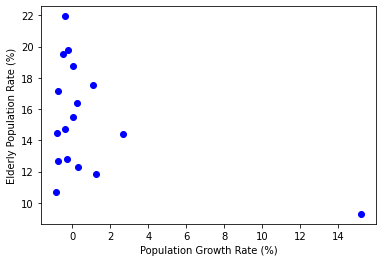

In [2]:
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# (1) 지역별 인구증가율과 고령인구비율 시각화
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

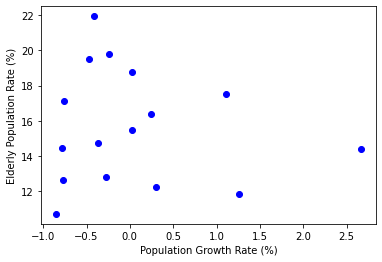

In [3]:
# (2) 지역별 인구증가율과 고령인구비율 시각화: 극단치 제거
#     세종시는 아마도 행정수도 이전으로 공무원 등 젊은 인구가 많이 이주하면서 인구증가율은 높고 고령인구비율은 낮은 데이타인 듯하여 제거한다

import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# 세종시 데이타 삭제
population_inc = population_inc[:5] + population_inc[6:]
population_old = population_old[:5] + population_old[6:]


plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 회귀선 구하기


## 2-1 최소제곱법을 이용한 회귀선 구하기

- 선형회귀(Linear Regression) : 데이터의 경향성을 가장 잘 설명하는 하나의 직선을 예측하는 것
- 잔차(redidual) : 데이터의 경향성을 가장 잘 설명하나는 하나의 직선과 각 데이타의 차이
- 최소제곱법(Least Square Method ) : 잔차의 제곱을 최소하하는 알고리즘

<img src='./imgs/최소제곱법.png' width='400'>

[참고] [ 최소제곱법 ](https://terms.naver.com/entry.nhn?docId=3569970&cid=58944&categoryId=58970)

최소제곱법으로 y=ax + b 의 a(기울기)와 b(절편)을 구한다
<img src='./imgs/최소제곱법2.png'  width='400'>

a: -0.355834147915461 b: 15.669317743971302


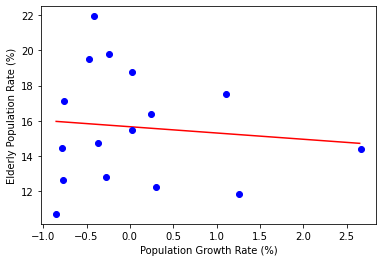

In [4]:
# (3) 최소제곱법으로 회귀선 구하기
import numpy as np
import matplotlib.pyplot as plt
# X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
# Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
X = population_inc
Y = population_old

# X, Y의 평균을 구합니다.
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 기울기 a,  절편b를 구합니다.
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a:', a, 'b:', b)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 붉은색 실선으로 회귀선을 그립니다.
plt.plot(line_x,line_y,'r-')

plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

[ 결과 ]

X값이 증가할 수록 Y값이 감소한다. 
(음의 상관관계 : 하나의 데이타가 증가하면 다른 데이타가 감소하는 관계 )
즉, 인구증가율이 증가하면 고령인구비율은 감소한다.

아래는 참고만 하자

##  2-2. 텐서플로를 이용해서 회귀선 구하기

99 a: 0.10581352 b: 6.9974103 loss: 84.80834
199 a: -0.13042049 b: 11.427912 loss: 27.7286
299 a: -0.26474538 b: 13.955318 loss: 12.711782
399 a: -0.32585266 b: 15.105159 loss: 10.098341
499 a: -0.34783587 b: 15.51882 loss: 9.8034
599 a: -0.35411283 b: 15.636934 loss: 9.781849
699 a: -0.355538 b: 15.663748 loss: 9.780834
799 a: -0.35579374 b: 15.668561 loss: 9.780805
899 a: -0.35582998 b: 15.669237 loss: 9.780804
999 a: -0.3558333 b: 15.669303 loss: 9.780805


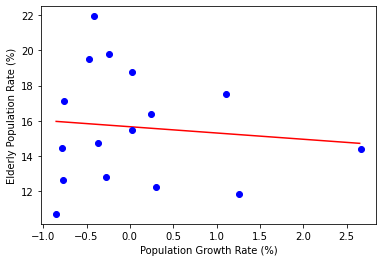

In [5]:
# (4) 텐서플로를 이용해서 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
# X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
# Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
X = population_inc
Y = population_old

# a와 b를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X + b
    # 잔차 : 기대출력 - 실제출력
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

# 최적화함수 : 복잡한 미분 계산 및 가중치 업데이트 등을 자동으로 진행해주는 도구
# Adam : 최적화 함수 중 하나로 손실(loss)이 낮아 성능이 우수함
# tf.keras.optimizers = tf.optimizers 동일
# 1000번의 학습으로 a와 b는 잔차의 제곱의 평균을 최소화하는 적절한 값에 도달한다.
optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 3. 다항 회귀(Polynomial Regression)

- 비선형 회귀 (Nonlinear Regression) : 선형회귀로 표현할 수 없는 데이터의 경향성을 설명하기 위한 회귀

- 다항 회귀 : 2차함수, 3차함수 등의 곡선이 되는 것

<img src='./imgs/2차함수.png'>


99 a: 3.8262687 b: -5.3006573 c: 6.387766 loss: 69.69342
199 a: 2.781773 b: -4.682406 c: 10.29924 loss: 31.557594
299 a: 1.310273 b: -2.449523 c: 12.920423 loss: 16.153355
399 a: 0.34497613 b: -0.9432061 c: 14.556291 loss: 11.033345
499 a: -0.1757117 b: -0.13060021 c: 15.439125 loss: 9.744558
599 a: -0.41821104 b: 0.24781139 c: 15.850437 loss: 9.496998
699 a: -0.51620096 b: 0.40071675 c: 16.016653 loss: 9.460584
799 a: -0.5506061 b: 0.45440385 c: 16.07501 loss: 9.456486
899 a: -0.5610974 b: 0.4707757 c: 16.092806 loss: 9.456135
999 a: -0.5638611 b: 0.4750884 c: 16.097494 loss: 9.456114


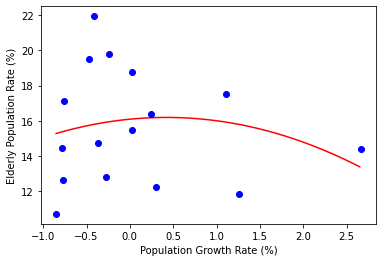

In [6]:
# (5) 텐서플로우를 이용해서 2차 함수 회귀선 구하기
#    위의 1차 함수 코드와 동일하고 2차 함수 식만 수정한다.

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]



# a, b, c를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    #**************************** 여기 식만 변경됨 
    y_pred = a * X*X + b * X + c
    loss = tf.reduce_mean((Y - y_pred) ** 2) 
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

[ 결과 ]

직선 회귀선보다 손실이 소량 감소했지만...

    1차 (직선 회귀선 ) - loss: 9.780804
    2차 (다항 회귀선 ) - loss: 9.456114